In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 


In [105]:
path = os.getcwd()
data = pd.read_csv(path+'/dados_coletados.csv')
data = data.iloc[:,1:]
data.head()

,dates,uf,state,cases,deaths,suspects,refuses
0,2020-02-26,CE,Ceará,0.0,0.0,0.0,1.0
1,2020-02-26,BA,Bahia,0.0,0.0,0.0,2.0
2,2020-02-26,PB,Paraíba,0.0,0.0,1.0,0.0
3,2020-02-26,PE,Pernambuco,0.0,0.0,1.0,0.0
4,2020-02-26,MG,Minas Gerais,0.0,0.0,2.0,2.0


## Separando

In [117]:
sp = data[data['uf']=='SP']
sp.index = np.arange(len(sp))

ce = data[data['uf']=='CE']
ce.index = np.arange(len(ce))

ma = data[data['uf']=='MA']
ma.index = np.arange(len(ma))

rj = data[data['uf']=='RJ']
rj.index = np.arange(len(rj))

mg = data[data['uf']=='MG']
mg.index = np.arange(len(mg))

rn = data[data['uf']=='RN']
rn.index = np.arange(len(rn))


d = [sp,rj,mg,ce,ma]
uf = ['SP','RJ','MG','CE','MA']
for i in d:print(len(i))

27
27
27
27
22


## Visualizaçẽos Iniciais

### Casos

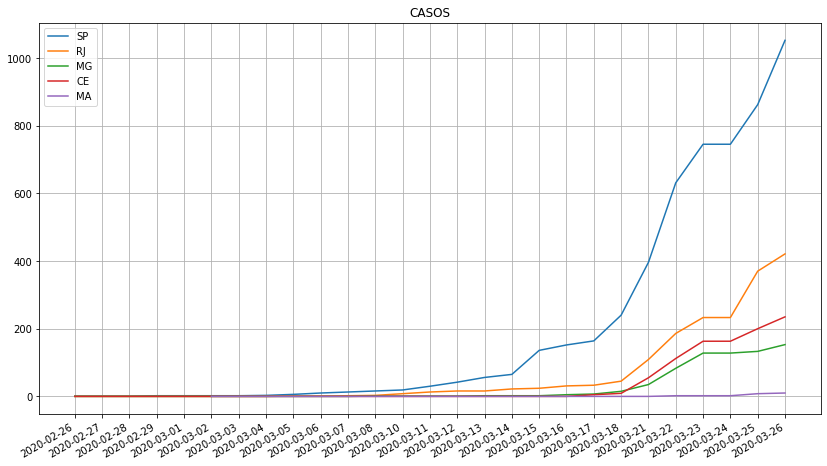

In [107]:
fig = plt.figure(figsize=(14,8))

for (i,j) in zip(d,uf):
    plt.plot('dates', 'cases', data=i,label=j)
plt.grid()
plt.title('CASOS')
plt.legend()
fig.autofmt_xdate()

### Mortes

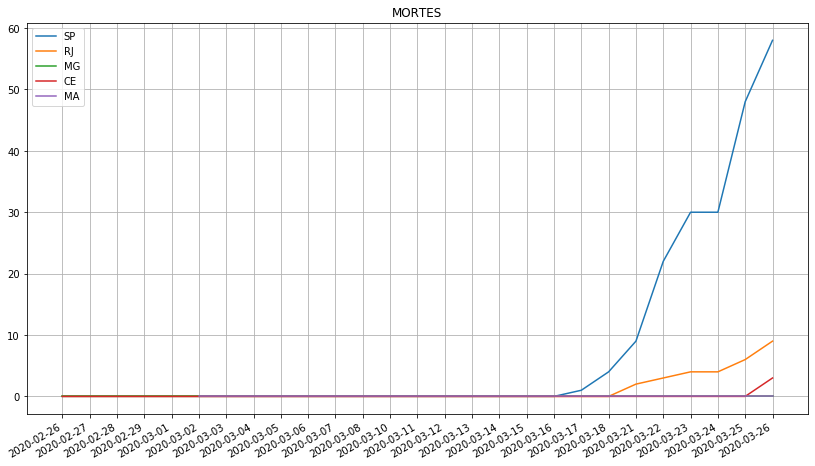

In [108]:
fig = plt.figure(figsize=(14,8))

for (i,j) in zip(d,uf):
    plt.plot('dates', 'deaths', data=i,label=j)
plt.grid()
plt.title('MORTES')
plt.legend()
fig.autofmt_xdate()

### Suspeitos

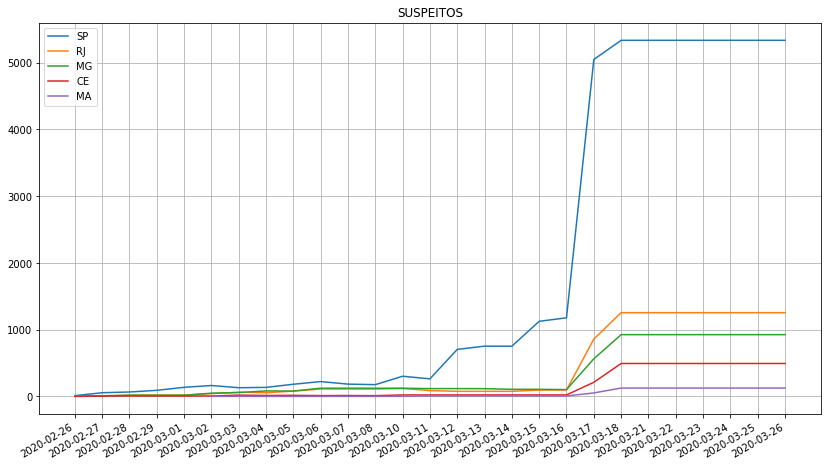

In [109]:
fig = plt.figure(figsize=(14,8))

for (i,j) in zip(d,uf):
    plt.plot('dates', 'suspects', data=i,label=j)
plt.grid()
plt.title('SUSPEITOS')
plt.legend()
fig.autofmt_xdate()

### Rejeitados

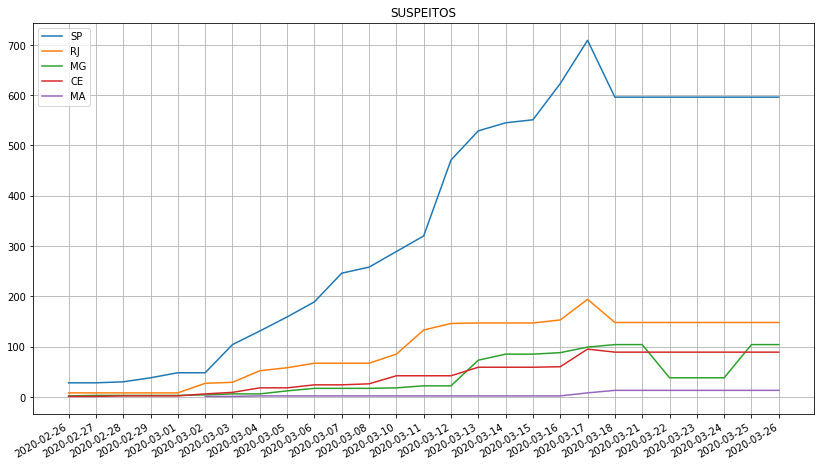

In [110]:
fig = plt.figure(figsize=(14,8))

for (i,j) in zip(d,uf):
    plt.plot('dates', 'refuses', data=i,label=j)
plt.grid()
plt.title('SUSPEITOS')
plt.legend()
fig.autofmt_xdate()

In [140]:
from functions.pop import *
print('CASOS\n')
t = 28

dc = []
col_ = ['estimador','uf','valor_estimado','real']
for (i,j,r) in zip(d[:-2],uf[:-2],[1406,558,205]):
    d_ = i['cases'].to_numpy()
    t0,t1,t2 = 1,13,26
    p0,p1,p2 = d_[0],d_[12],d_[-1]
    dc.append(['pa',j,pa(t,p0,p2,t0,t2),r])
    dc.append(['pg',j,pg(p0,p2,t,t0,t2),r])
    dc.append(['pt',j,pt(p0,p1,p2,t,t0,t2),r])
    
dc = pd.DataFrame(data=dc,columns=col_)

dc = dc.fillna(0)
dc['valor_estimado'] = dc['valor_estimado'].apply(lambda x:int(x))
dc

CASOS



/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:12: RuntimeWarning: divide by zero encountered in log
  kg = (np.log(p2)-np.log(p0))/(t2-t0)
/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return p0*np.exp(1)**(kg*(t-t0))
/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:18: RuntimeWarning: divide by zero encountered in log
  kd = (-np.log((ps-p2)/(ps-p0))/(t2-t0))


,estimador,uf,valor_estimado,real
0,pa,SP,1136,1406
1,pg,SP,1835,1406
2,pt,SP,1199,1406
3,pa,RJ,454,558
4,pg,RJ,0,558
5,pt,RJ,421,558
6,pa,MG,165,205
7,pg,MG,0,205
8,pt,MG,153,205


In [142]:
print('SUSPEITOS\n')
t = 28

ds = []
for (i,j,r) in zip(d[:-2],uf[:-2],[5334,1254,925]):
    d_ = i['suspects'].to_numpy()
    t0,t1,t2 = 1,13,26
    p0,p1,p2 = d_[0],d_[12],d_[-1]
    ds.append(['pa',j,int(pa(t,p0,p2,t0,t2)),r])
    ds.append(['pg',j,int(pg(p0,p2,t,t0,t2)),r])
    ds.append(['pt',j,int(pt(p0,p1,p2,t,t0,t2)),r])
    
ds = pd.DataFrame(data=ds,columns=col_)
ds

SUSPEITOS



,estimador,uf,valor_estimado,real
0,pa,SP,5759,5334
1,pg,SP,8747,5334
2,pt,SP,5658,5334
3,pa,RJ,1354,1254
4,pg,RJ,2099,1254
5,pt,RJ,1285,1254
6,pa,MG,998,925
7,pg,MG,1511,925
8,pt,MG,941,925


In [143]:
print('Rejeitados\n')
t = 28

dr = []

for (i,j,r) in zip(d[:-2],uf[:-2],[596,148,104]):
    d_ = i['refuses'].to_numpy()
    t0,t1,t2 = 1,13,26
    p0,p1,p2 = d_[0],d_[12],d_[-1]
    dr.append(['pa',j,int(pa(t,p0,p2,t0,t2)),r])
    dr.append(['pg',j,int(pg(p0,p2,t,t0,t2)),r])
    dr.append(['pt',j,int(pt(p0,p1,p2,t,t0,t2)),r])
    
    
dr = pd.DataFrame(data=dr,columns=col_)
dr

Rejeitados



,estimador,uf,valor_estimado,real
0,pa,SP,641,596
1,pg,SP,761,596
2,pt,SP,603,596
3,pa,RJ,159,148
4,pg,RJ,186,148
5,pt,RJ,149,148
6,pa,MG,112,104
7,pg,MG,142,104
8,pt,MG,109,104


In [144]:
print('MORTES\n')
t = 28

dm = []

for (i,j,r) in zip(d[:-2],uf[:-2],[84,13,0]):
    d_ = i['deaths'].to_numpy()
    t0,t1,t2 = 1,13,26
    p0,p1,p2 = d_[0],d_[12],d_[-1]
    dm.append(['pa',j,pa(t,p0,p2,t0,t2),r])
    dm.append(['pg',j,pg(p0,p2,t,t0,t2),r])
    dm.append(['pt',j,pt(p0,p1,p2,t,t0,t2),r])
    
dm = pd.DataFrame(data=dm,columns=col_)

dm = dm.fillna(0)
dm['valor_estimado'] = dm['valor_estimado'].apply(lambda x:int(x))
dm

MORTES



/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:12: RuntimeWarning: divide by zero encountered in log
  kg = (np.log(p2)-np.log(p0))/(t2-t0)
/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:13: RuntimeWarning: invalid value encountered in double_scalars
  return p0*np.exp(1)**(kg*(t-t0))
/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:17: RuntimeWarning: invalid value encountered in double_scalars
  ps = (2*p0*p1*p2-p1**2*(p0+p2))/(p0*p2-p1**2)
/home/davi/Documentos/Github/covid19_predict/notebooks/functions/pop.py:12: RuntimeWarning: invalid value encountered in double_scalars
  kg = (np.log(p2)-np.log(p0))/(t2-t0)


,estimador,uf,valor_estimado,real
0,pa,SP,62,84
1,pg,SP,0,84
2,pt,SP,0,84
3,pa,RJ,9,13
4,pg,RJ,0,13
5,pt,RJ,0,13
6,pa,MG,0,0
7,pg,MG,0,0
8,pt,MG,0,0


In [112]:
rn

,dates,uf,state,cases,deaths,suspects,refuses
0,2020-02-27,RN,Rio Grande do Norte,0.0,0.0,4.0,0.0
1,2020-02-28,RN,Rio Grande do Norte,0.0,0.0,3.0,2.0
2,2020-02-29,RN,Rio Grande do Norte,0.0,0.0,3.0,2.0
3,2020-03-01,RN,Rio Grande do Norte,0.0,0.0,3.0,2.0
4,2020-03-02,RN,Rio Grande do Norte,0.0,0.0,2.0,6.0
5,2020-03-03,RN,Rio Grande do Norte,0.0,0.0,2.0,6.0
6,2020-03-04,RN,Rio Grande do Norte,0.0,0.0,5.0,6.0
7,2020-03-05,RN,Rio Grande do Norte,0.0,0.0,4.0,8.0
8,2020-03-06,RN,Rio Grande do Norte,0.0,0.0,7.0,8.0
9,2020-03-07,RN,Rio Grande do Norte,0.0,0.0,4.0,11.0


pa 24.18181818181818
pg 72.59600142050958
pt 63.72912510265118
real 65.0


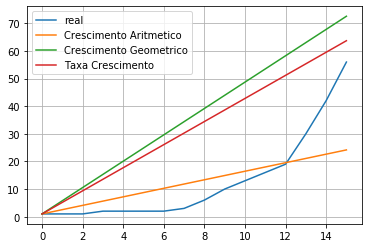

In [113]:
def pa(t,p0,p2,t0,t2):
    ka = (p2-p0)/(t2-t0)
    return p0 + ka*(t-t0)

def pg(t,p0,p2,t0,t2):
    kg = (np.log(p2)-np.log(p0))/(t2-t0)
    return p0*np.exp(1)**(kg*(t-t0))

def pt(p0,p1,p2,t,t0,t2):
    ps = (2*p0*p1*p2-p1**2*(p0+p2))/(p0*p2-p1**2)
    kd = (-np.log((ps-p2)/(ps-p0))/(t2-t0))
    return p0 + (ps-p0)*(1-np.exp(1)**(-kd*(t-t0)))

def cl(p0,p1,p2,t,t0,t1,t2):
    ps = (2*p0*p1*p2-p1**2*(p0+p2))/(p0*p2-p1**2)
    c = (ps-p0)/p0
    k1 = (1/(t2-t1))*(np.log((p0*(ps-p1)/(p1*(ps-p0)))))
    return ps/(1+c*np.exp(1)**(k1*(t-t0)))

d = sp['cases'].to_numpy()
t0,t1,t2 = 1,6,12
p0,p1,p2 = d[0],d[5],d[11]

t = 18



print('pa',pa(t,p0,p2,t0,t2))
print('pg',pg(t,p0,p2,t0,t2))
print('pt',pt(p0,p1,p2,t,t0,t2))
print('real',d[16])
# print(cl(p0,p1,p2,t,t0,t1,t2))

plt.plot(d[:16],label='real')
plt.plot(np.linspace(1,pa(t,p0,p2,t0,t2),t-2),label='Crescimento Aritmetico')
plt.plot(np.linspace(1,pg(t,p0,p2,t0,t2),t-2),label='Crescimento Geometrico')
plt.plot(np.linspace(1,pt(p0,p1,p2,t,t0,t2),t-2),label='Taxa Crescimento')
plt.legend()
plt.grid()


/home/davi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/davi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/davi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/davi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


[1.0,
 9.0,
 2.0,
 2.0,
 8.5,
 26.0,
 41.5,
 41.0,
 37.0,
 37.0,
 65.0,
 88.0,
 95.0,
 88.0,
 176.0,
 152.0,
 150.0,
 152.0,
 48.0,
 -151.0,
 -127.5,
 403.0,
 452.5]

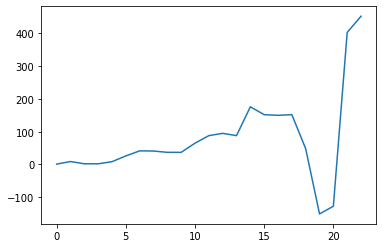

In [114]:
vpa =[]
vpg = []
vpt = []

t0,t1,t2 = 1,2,3
p0,p1,p2 = d[0],d[1],d[2]
for i in range(1,24):
    vpa.append(pa(t,p0,p2,t0,t2))
    vpg.append(pg(t,p0,p2,t0,t2))
    vpt.append(pt(p0,p1,p2,t,t0,t2))
    t0+=1
    t1+=1
    t2+=1
    p0,p1,p2 = d[i+1],d[i+2],d[i+3]

plt.plot(vpa)
vpa
# plt.plot(vpg)
# plt.plot(vpt)

In [115]:
# REAL - 28 de março
real = [
    {
        "uid": 35,
            "uf": "SP",
            "state": "São Paulo",
            "cases": 1406,
            "deaths": 84,
            "suspects": 5334,
            "refuses": 596,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 33,
            "uf": "RJ",
            "state": "Rio de Janeiro",
            "cases": 558,
            "deaths": 13,
            "suspects": 1254,
            "refuses": 148,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 23,
            "uf": "CE",
            "state": "Ceará",
            "cases": 314,
            "deaths": 4,
            "suspects": 493,
            "refuses": 89,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
  
        {
            "uid": 31,
            "uf": "MG",
            "state": "Minas Gerais",
            "cases": 205,
            "deaths": 0,
            "suspects": 925,
            "refuses": 104,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 24,
            "uf": "RN",
            "state": "Rio Grande do Norte",
            "cases": 45,
            "deaths": 0,
            "suspects": 108,
            "refuses": 22,
            "datetime": "2020-03-28T21:33:34.708Z"
        },
        {
            "uid": 21,
            "uf": "MA",
            "state": "Maranhão",
            "cases": 14,
            "deaths": 0,
            "suspects": 125,
            "refuses": 13,
            "datetime": "2020-03-28T21:33:34.708Z"
        }
    ]
